In [ ]:
"""
05_sosa_vs_zaldivia_2026.ipynb
Cell 1 — Setup
Loads 03_visualization for all functions and helpers.
Full CSVs are reloaded because 03_visualization overwrites df_2026/df_2025
with a 3-row test fixture at the end of its test section.
OUTPUT_PATH is redirected to outputs/sosa_vs_zaldivia/ to keep files organised.
"""
%run 03_visualization.ipynb

# Reload full league datasets (overwrite 3-row test fixture)
df_2026 = pd.read_csv(PROC_PATH / "primera_division_2026_processed.csv")
df_2025 = pd.read_csv(PROC_PATH / "primera_division_2025_processed.csv")

# Route all exports to this post's subdirectory (idempotent on re-runs)
OUTPUT_PATH = Path("../outputs/sosa_vs_zaldivia")
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

print("03_visualization loaded — full CSVs restored.")
print(f"    df_2026 : {df_2026.shape}  |  players: {df_2026['player'].nunique()}")
print(f"    df_2025 : {df_2025.shape}  |  players: {df_2025['player'].nunique()}")
print(f"    OUTPUT_PATH: {OUTPUT_PATH.resolve()}")


test_found_case_insensitive (__main__.TestGetPlayer.test_found_case_insensitive) ... ok
test_found_exact (__main__.TestGetPlayer.test_found_exact) ... ok
test_found_uppercase (__main__.TestGetPlayer.test_found_uppercase) ... ok
test_not_found_returns_none (__main__.TestGetPlayer.test_not_found_returns_none) ... ok
test_returns_first_row_when_duplicate (__main__.TestGetPlayer.test_returns_first_row_when_duplicate) ... ok
test_integer_input_pct (__main__.TestFmt.test_integer_input_pct) ... ok
test_non_pct_col_returns_float (__main__.TestFmt.test_non_pct_col_returns_float) ... ok
test_non_pct_col_two_decimals (__main__.TestFmt.test_non_pct_col_two_decimals) ... ok
test_pct_col_returns_int (__main__.TestFmt.test_pct_col_returns_int) ... ok
test_pct_col_rounds_up (__main__.TestFmt.test_pct_col_rounds_up) ... ok
test_pool_contains_both_seasons (__main__.TestGetPool.test_pool_contains_both_seasons) ... ok
test_pool_only_target_position (__main__.TestGetPool.test_pool_only_target_position) ...

2026 -> (237, 88)
2025 -> (416, 88)
Metrics and labels defined.
player              Fernando Zampedri
team             Universidad Católica
goals                               6
goals_p90                         1.5
minutesPlayed                     360
Name: 196, dtype: object

✅  All tests passed.
✅  03_visualization loaded — full CSVs restored.
    df_2026 : (237, 88)  |  players: 236
    df_2025 : (416, 88)  |  players: 415
    OUTPUT_PATH: C:\Users\PC\Projects\CaciqueAnalytics\outputs\sosa_vs_zaldivia


In [ ]:
"""
Cell 2 — Post constants
ONLY EDIT THIS CELL to reuse the notebook for a different pair of players.
Change PLAYER1_NAME / PLAYER2_NAME and re-run everything (Run All).
"""
# ── Players ─────────────────────────────────────────────────────────────────
PLAYER1_NAME   = "Joaquín Sosa"
PLAYER1_TEAM   = "Colo-Colo"
PLAYER1_COLOR  = "#E00D16"            # Cacique red
PLAYER1_PHOTO  = r"C:\Users\PC\Projects\CaciqueAnalytics\assets\joaquin_sosa.jpg"

PLAYER2_NAME   = "Jonathan Villagra"
PLAYER2_TEAM   = "Colo-Colo"
PLAYER2_COLOR  = "#1A1A1A"            # Cacique black
PLAYER2_PHOTO  = r"C:\Users\PC\Projects\CaciqueAnalytics\assets\jonathan_villagra.jpg"

SEASON         = "2026"
POSITION       = "Defenders"

# ── Metrics for percentile bars (visual order of the post) ──────────────────
STATS_COMPARISON = [
    ("groundDuelsWon_p90",          "Ground duels won",      "p/90'", False),
    ("aerialDuelsWonPercentage",    "Aerial duels won",      "%",     True),
    ("interceptions_p90",           "Interceptions",         "p/90'", False),
    ("clearances_p90",              "Clearances",            "p/90'", False),
    ("accuratePassesPercentage",    "Pass accuracy",         "%",     True),
    ("accurateLongBallsPercentage", "Accurate long balls",   "%",     True),
]

print(f"Comparison  : {PLAYER1_NAME} ({PLAYER1_TEAM}) vs {PLAYER2_NAME} ({PLAYER2_TEAM})")
print(f"Season      : {SEASON}  |  Position : {POSITION}")
print(f"Metrics     : {len(STATS_COMPARISON)}")


Comparison  : Joaquín Sosa (Colo-Colo) vs Matías Zaldivia (Universidad de Chile)
Season      : 2026  |  Position : Defenders
Metrics     : 6


In [ ]:
"""
Cell 3 — Debug
Prints the raw values for both players across all radar metrics.
Verify that both players have enough minutes before publishing.
"""
p1 = get_player(df_2026, PLAYER1_NAME)
p2 = get_player(df_2026, PLAYER2_NAME)

if p1 is not None and p2 is not None:
    pool    = _get_pool(POSITION)
    metrics = RADAR_METRICS[POSITION]

    print(f"{'Metric':<35} {PLAYER1_NAME:>18} {PLAYER2_NAME:>18} {'League avg':>12}")
    print("-" * 85)
    for m in metrics:
        v1  = float(p1[m])
        v2  = float(p2[m])
        med = float(pool[m].median())
        if m in {"aerialDuelsWonPercentage", "accuratePassesPercentage",
                 "accurateLongBallsPercentage", "groundDuelsWonPercentage"}:
            print(f"{m:<35} {v1:>17.1f}% {v2:>17.1f}% {med:>11.1f}%")
        else:
            print(f"{m:<35} {v1:>18.2f} {v2:>18.2f} {med:>12.2f}")

    print(f"\nMinutes played — {PLAYER1_NAME}: {int(p1['minutesPlayed'])} min  | "
          f"{PLAYER2_NAME}: {int(p2['minutesPlayed'])} min")

Metric                                    Joaquín Sosa    Matías Zaldivia   League avg
-------------------------------------------------------------------------------------
groundDuelsWon_p90                                4.00               2.50         2.77
interceptions_p90                                 0.75               1.00         1.02
clearances_p90                                    4.25               4.50         4.23
aerialDuelsWonPercentage                         30.8%              72.2%        55.4%
accuratePassesPercentage                         89.9%              78.3%        80.5%
successfulDribbles_p90                            0.00               0.50         0.31

⏱  Minutes — Joaquín Sosa: 360 min  | Matías Zaldivia: 360 min


Saved -> outputs/Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026.png
Saved -> outputs/Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_transparent.png


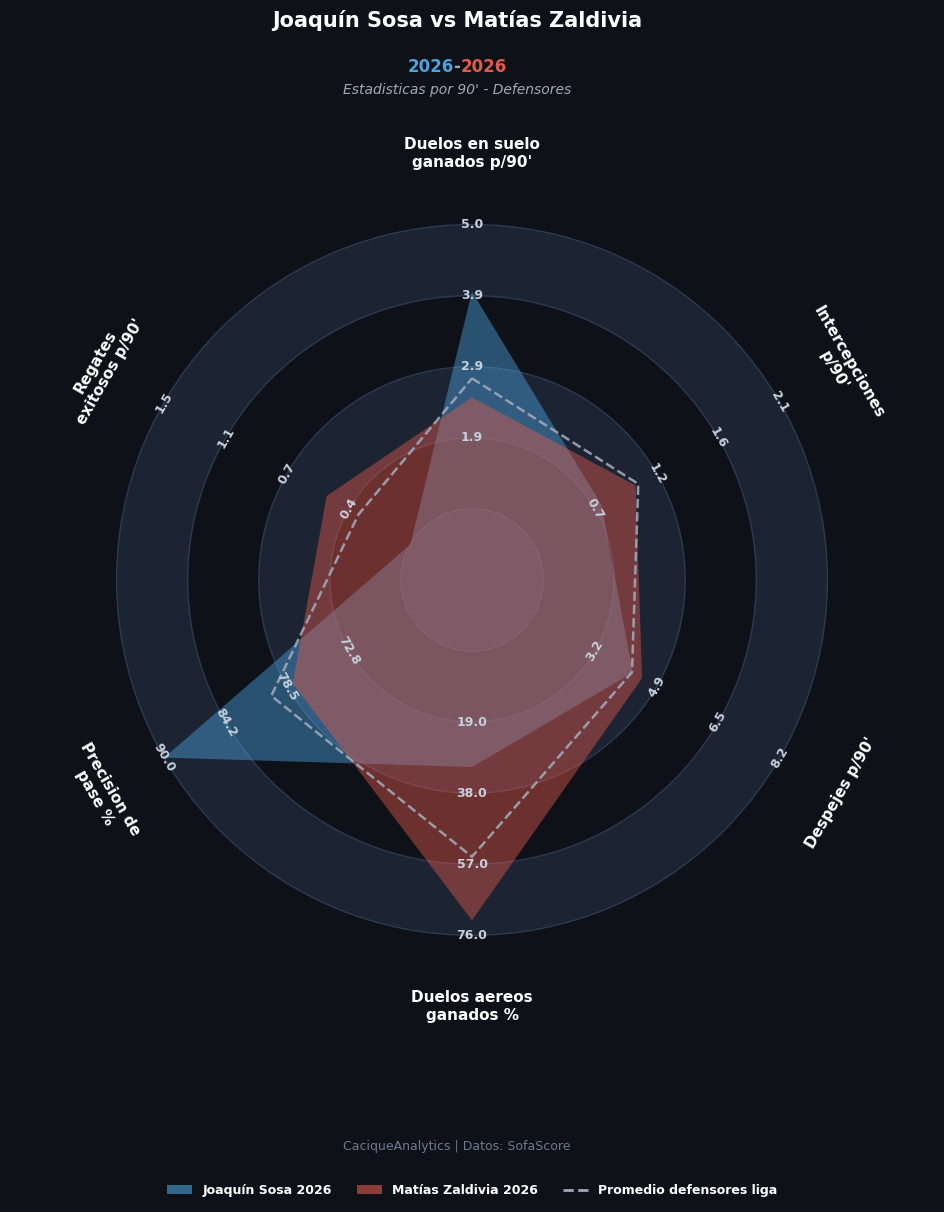

In [16]:
"""
Cell 4 — Full radar overlay
Sosa vs Zaldivia 2026 with header, legend and footer.
Red = Sosa (Colo-Colo)  |  Blue = Zaldivia (U de Chile)  |  Dashed = league avg
Exports dark-background PNG + transparent PNG.
"""
build_radar(
    player1_name = PLAYER1_NAME,
    season1      = SEASON,
    player2_name = PLAYER2_NAME,
    season2      = SEASON,
    position     = POSITION,
    minimal      = False,
)

Saved -> outputs/Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_minimal.png
Saved -> outputs/Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_minimal_transparent.png


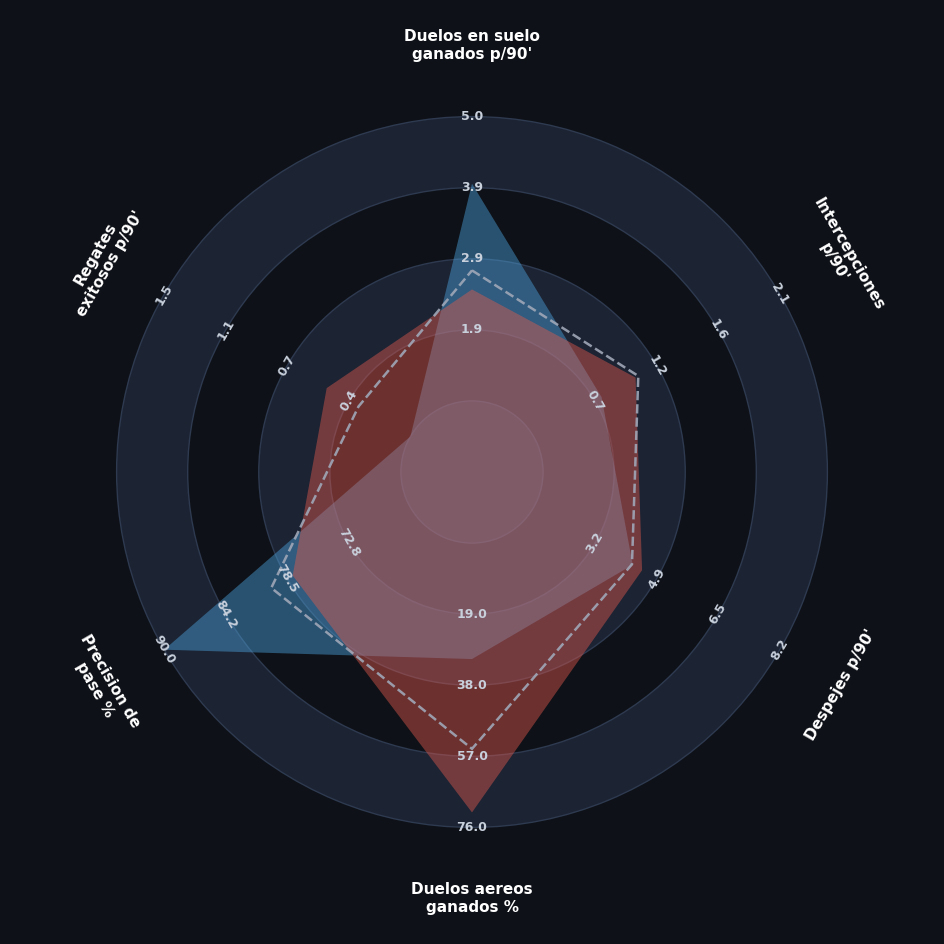

In [17]:
"""
Cell 5 — Minimal radar overlay
Polygon only, no decoration. For compositing in Canva or Photopea.
Exports dark-background PNG + transparent PNG.
"""
build_radar(
    player1_name = PLAYER1_NAME,
    season1      = SEASON,
    player2_name = PLAYER2_NAME,
    season2      = SEASON,
    position     = POSITION,
    minimal      = True,
)

In [18]:
"""
Cell 6 — Side-by-side comparison card
Split-screen layout: opposed percentile bars.
  Left   : Sosa    (red)
  Centre : metric label
  Right  : Zaldivia (blue)
Bar fill represents percentile rank within the league defender pool.
Exports dark-background PNG + transparent PNG.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import percentileofscore

def build_comparison_card(
    player1_name: str, player1_team: str, player1_color: str,
    player2_name: str, player2_team: str, player2_color: str,
    season: str, position: str,
    stats: list,
) -> None:
    """
    Builds a horizontal split-screen comparison card.
    stats: list of (column, label, unit, is_percentage)
    """
    df   = df_2026 if season == "2026" else df_2025
    p1   = get_player(df, player1_name)
    p2   = get_player(df, player2_name)
    if p1 is None or p2 is None:
        return

    pool = _get_pool(position)

    # Compute percentiles
    metrics    = [s[0] for s in stats]
    labels     = [s[1] for s in stats]
    units      = [s[2] for s in stats]
    is_pcts    = [s[3] for s in stats]

    pct1, pct2 = [], []
    val1, val2 = [], []
    for col in metrics:
        series  = pool[col].dropna()
        v1      = float(p1[col])
        v2      = float(p2[col])
        pct1.append(percentileofscore(series, v1, kind='rank'))
        pct2.append(percentileofscore(series, v2, kind='rank'))
        val1.append(v1)
        val2.append(v2)

    # ── Layout ──────────────────────────────────────────────────────────────
    T          = THEME
    n          = len(metrics)
    fig_h      = 1.8 + n * 0.72
    fig, ax    = plt.subplots(figsize=(10, fig_h))
    fig.set_facecolor(T["bg"])
    ax.set_facecolor(T["bg"])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-0.5, n)
    ax.axis("off")

    BAR_MAX    = 0.82    # max normalised bar width (0..1 → -BAR_MAX..0 and 0..BAR_MAX)
    BAR_H      = 0.30
    ALPHA_BG   = 0.12
    ALPHA_FG   = 0.85

    for i, (m, lbl, unit, is_pct) in enumerate(zip(metrics, labels, units, is_pcts)):
        y      = n - 1 - i
        p_left  = pct1[i] / 100
        p_right = pct2[i] / 100
        v_left  = val1[i]
        v_right = val2[i]

        # Left bar track
        ax.barh(y, -BAR_MAX, left=0,   height=BAR_H, color=player1_color,
                alpha=ALPHA_BG, align='center')
        # Left bar fill (grows to the left)
        ax.barh(y, -(p_left * BAR_MAX), left=0, height=BAR_H,
                color=player1_color, alpha=ALPHA_FG, align='center')

        # Right bar track
        ax.barh(y, BAR_MAX, left=0, height=BAR_H, color=player2_color,
                alpha=ALPHA_BG, align='center')
        # Right bar fill
        ax.barh(y, p_right * BAR_MAX, left=0, height=BAR_H,
                color=player2_color, alpha=ALPHA_FG, align='center')

        # Centre label
        ax.text(0, y, lbl, color=T["label"], fontsize=9.5,
                ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.18', facecolor=T["bg"],
                          edgecolor='none', alpha=0.95))

        # Numeric value — left player
        fmt = f"{v_left:.1f}{unit}" if is_pct else f"{v_left:.2f} {unit}"
        ax.text(-BAR_MAX - 0.02, y, fmt,
                color=player1_color, fontsize=9, ha='right', va='center',
                fontweight='bold')

        # Numeric value — right player
        fmt2 = f"{v_right:.1f}{unit}" if is_pct else f"{v_right:.2f} {unit}"
        ax.text(BAR_MAX + 0.02, y, fmt2,
                color=player2_color, fontsize=9, ha='left', va='center',
                fontweight='bold')

        # Percentile below value
        ax.text(-BAR_MAX - 0.02, y - 0.22, f"p{pct1[i]:.0f}",
                color=player1_color, fontsize=7.5, ha='right', va='center', alpha=0.75)
        ax.text(BAR_MAX + 0.02, y - 0.22, f"p{pct2[i]:.0f}",
                color=player2_color, fontsize=7.5, ha='left', va='center', alpha=0.75)

    # ── Header ───────────────────────────────────────────────────────────────
    fig.text(0.22, 0.97, player1_name,  color=player1_color, fontsize=14,
             fontweight='bold', ha='center', va='top', transform=fig.transFigure)
    fig.text(0.22, 0.93, player1_team,  color=T["avg"],   fontsize=10,
             ha='center', va='top', transform=fig.transFigure)
    fig.text(0.78, 0.97, player2_name,  color=player2_color, fontsize=14,
             fontweight='bold', ha='center', va='top', transform=fig.transFigure)
    fig.text(0.78, 0.93, player2_team,  color=T["avg"],   fontsize=10,
             ha='center', va='top', transform=fig.transFigure)
    fig.text(0.50, 0.97, "VS",          color=T["label"],  fontsize=18,
             fontweight='black', ha='center', va='top', transform=fig.transFigure)
    fig.text(0.50, 0.93, f"Season {season} · {position}",
             color=T["credit"], fontsize=9, ha='center', va='top',
             transform=fig.transFigure)

    # ── Footer ───────────────────────────────────────────────────────────────
    fig.text(0.50, 0.015, "Bars show percentile rank vs all league defenders  |  CaciqueAnalytics · Data: SofaScore",
             color=T["credit"], fontsize=7.5, ha='center', va='bottom',
             transform=fig.transFigure)

    plt.tight_layout(rect=[0, 0.02, 1, 0.92])

    base = (f"{player1_name.replace(' ', '_')}_vs_"
            f"{player2_name.replace(' ', '_')}_{season}_comparison_card")
    _save(fig, f"{base}.png")
    _save(fig, f"{base}_transparent.png", transparent=True)
    plt.show()

print("build_comparison_card defined.")

build_comparison_card defined.


Saved -> outputs/Joaquín_Sosa_vs_Matías_Zaldivia_2026_comparison_card.png
Saved -> outputs/Joaquín_Sosa_vs_Matías_Zaldivia_2026_comparison_card_transparent.png


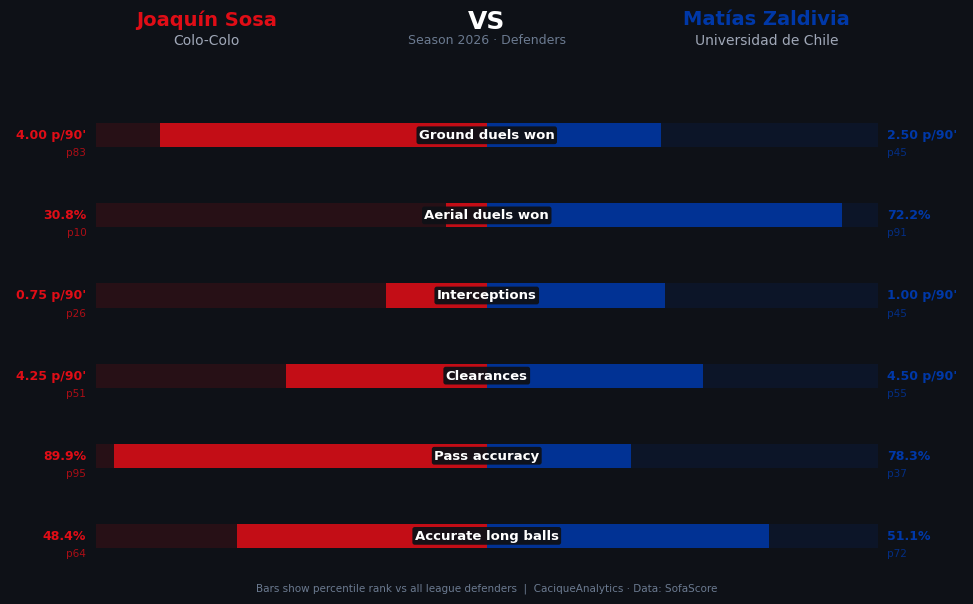

In [19]:
"""
Cell 7 — Run comparison card
Generates the comparison card using each team's official colours.
"""
build_comparison_card(
    player1_name  = PLAYER1_NAME,
    player1_team  = PLAYER1_TEAM,
    player1_color = PLAYER1_COLOR,
    player2_name  = PLAYER2_NAME,
    player2_team  = PLAYER2_TEAM,
    player2_color = PLAYER2_COLOR,
    season        = SEASON,
    position      = POSITION,
    stats         = STATS_COMPARISON,
)

In [ ]:
"""
Cell 7b — Banner constants (Spanish labels, cream background)
Uses the THEME_LIGHT palette from the Jeyson Rojas infographic.
Metric labels are intentionally in Spanish for the Chilean audience.
"""
# Cream background palette — same as the Jeyson Rojas infographic
COMP_THEME = {
    "bg":     "#e9e3d8",   # cream / linen
    "ring":   "#ccc5b8",   # radar ring
    "edge":   "#9a9080",   # separator lines
    "label":  "#1A1A1A",   # primary text
    "avg":    "#3A3530",   # secondary text
    "credit": "#7A7060",   # footer / credits
    "track":  "#D5CCBF",   # empty bar track
}

# Spanish metric labels — user-friendly for the Chilean audience
STATS_COMPARISON_ES = [
    # (column,                         short label,              unit,   is_percentage)
    ("groundDuelsWon_p90",          "Duelos en suelo\nganados",   "p/90'", False),
    ("aerialDuelsWonPercentage",    "Duelos aéreos\nganados",     "%",     True),
    ("interceptions_p90",           "Intercepciones",             "p/90'", False),
    ("clearances_p90",              "Despejes",                   "p/90'", False),
    ("accuratePassesPercentage",    "Precisión\nde pase",         "%",     True),
    ("accurateLongBallsPercentage", "Pelotas largas\nprecisas",   "%",     True),
]

print("COMP_THEME and STATS_COMPARISON_ES defined.")
print(f"  Metrics: {len(STATS_COMPARISON_ES)}")


COMP_THEME y STATS_COMPARISON_ES definidos.
  Métricas: 6


In [ ]:
"""
Cell 7c — build_comparison_banner  (v2)
Improved horizontal banner for social media.
Layout: [player 1 panel] | [comparison bars] | [player 2 panel]

Features:
  · Cream background (#e9e3d8) — same palette as the Jeyson Rojas infographic
  · All display text in Spanish (for the Chilean audience)
  · Percentile shown as "Top X%" for readability
  · Winning bar highlighted with a border
  · Supports real photo (with gradient fade) or solid colour panel as fallback
  · Exports dark-background PNG + transparent PNG
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as pe
import numpy as np
from PIL import Image
from scipy.stats import percentileofscore
from matplotlib.colors import to_rgba, LinearSegmentedColormap


def build_comparison_banner(
    player1_name: str, player1_team: str, player1_color: str, player1_photo: str,
    player2_name: str, player2_team: str, player2_color: str, player2_photo: str,
    season: str, position: str,
    stats: list,
) -> None:
    """
    Horizontal comparison banner with a cream background.
    stats: list of (column, spanish_label, unit, is_percentage)
    """
    df   = df_2026 if season == "2026" else df_2025
    p1   = get_player(df, player1_name)
    p2   = get_player(df, player2_name)
    if p1 is None or p2 is None:
        return

    pool = _get_pool(position)
    T    = COMP_THEME

    # ── Compute percentiles and raw values ─────────────────────────────────
    metrics = [s[0] for s in stats]
    labels  = [s[1] for s in stats]
    units   = [s[2] for s in stats]
    is_pcts = [s[3] for s in stats]

    pct1, pct2 = [], []
    val1, val2 = [], []
    for col in metrics:
        series = pool[col].dropna()
        v1 = float(p1[col])
        v2 = float(p2[col])
        pct1.append(percentileofscore(series, v1, kind='rank'))
        pct2.append(percentileofscore(series, v2, kind='rank'))
        val1.append(v1)
        val2.append(v2)

    n = len(metrics)

    # ── Figure and grid ─────────────────────────────────────────────────────
    fig = plt.figure(figsize=(20, 12), facecolor=T["bg"])
    gs = gridspec.GridSpec(
        1, 3,
        left=0.0, right=1.0,
        top=1.0, bottom=0.0,
        wspace=0.0,
        width_ratios=[0.27, 0.46, 0.27],
    )
    ax_l = fig.add_subplot(gs[0, 0])   # player 1 panel
    ax_c = fig.add_subplot(gs[0, 1])   # comparison bars
    ax_r = fig.add_subplot(gs[0, 2])   # player 2 panel

    for ax in [ax_l, ax_c, ax_r]:
        ax.set_facecolor(T["bg"])
        ax.axis("off")
        ax.set_clip_on(False)   # prevent centre text from being clipped

    # ── Helper: player side panel ────────────────────────────────────────────
    def draw_player_panel(ax, photo_path, nombre, equipo, color, lado):
        """Renders photo (or colour panel) + name + team + gradient fade toward centre."""
        ha     = 'left'  if lado == 'left' else 'right'
        name_x = 0.10   if lado == 'left' else 0.90

        # Try to load photo
        try:
            img = Image.open(photo_path).convert("RGB")
            ax.imshow(np.array(img), aspect='auto',
                      extent=[0, 1, 0, 1],
                      transform=ax.transAxes, zorder=1)
        except Exception:
            # Fallback: team-colour gradient panel
            from matplotlib.colors import to_rgb
            r, g, b = to_rgb(color)
            grad = np.zeros((200, 200, 4))
            for row in range(200):
                for col_idx in range(200):
                    t = col_idx / 199 if lado == 'left' else (199 - col_idx) / 199
                    alpha = max(0.0, min(0.35, t * 0.60))
                    grad[row, col_idx] = [r, g, b, alpha]
            ax.imshow(grad, aspect='auto',
                      extent=[0, 1, 0, 1], transform=ax.transAxes, zorder=2)

            # Decorative concentric ellipses in team colour
            for radius, a in [(0.50, 0.07), (0.32, 0.09), (0.18, 0.12)]:
                ax.add_patch(mpatches.Ellipse(
                    (0.50, 0.50), radius * 0.85, radius,
                    facecolor=color, alpha=a,
                    transform=ax.transAxes, zorder=3,
                ))

        # Gradient fade toward the centre panel
        if lado == 'left':
            fade_colors = [(*(to_rgba(T["bg"])[:3]), 0.0), (*(to_rgba(T["bg"])[:3]), 0.96)]
        else:
            fade_colors = [(*(to_rgba(T["bg"])[:3]), 0.96), (*(to_rgba(T["bg"])[:3]), 0.0)]
        fade_cmap = LinearSegmentedColormap.from_list("fade", fade_colors)
        grad_data = np.linspace(0, 1, 256).reshape(1, -1)
        ax.imshow(grad_data, aspect='auto',
                  extent=[0, 1, 0, 1], cmap=fade_cmap,
                  transform=ax.transAxes, zorder=4, alpha=0.78)

        # Top colour stripe (fades downward)
        top_colors = [
            (*(to_rgba(color)[:3]), 0.75),
            (*(to_rgba(color)[:3]), 0.0),
        ]
        top_cmap   = LinearSegmentedColormap.from_list("top_fade", top_colors)
        top_data   = np.linspace(1, 0, 100).reshape(-1, 1)
        ax.imshow(top_data, aspect='auto',
                  extent=[0, 1, 0.78, 1.0], cmap=top_cmap,
                  transform=ax.transAxes, zorder=5, alpha=0.60)

        # Team name (top)
        ax.text(name_x, 0.90, equipo.upper(),
                color="white", fontsize=10.5, fontweight='bold',
                ha=ha, va='top',
                transform=ax.transAxes, zorder=7,
                path_effects=[pe.withStroke(linewidth=2.5, foreground=color)])

        # Player name (large, top)
        partes = nombre.split(' ', 1)
        ax.text(name_x, 0.83, partes[0],
                color="white", fontsize=20, fontweight='black',
                ha=ha, va='top',
                transform=ax.transAxes, zorder=7,
                path_effects=[pe.withStroke(linewidth=5, foreground=color)])
        if len(partes) > 1:
            ax.text(name_x, 0.73, partes[1],
                    color="white", fontsize=16, fontweight='black',
                    ha=ha, va='top',
                    transform=ax.transAxes, zorder=7,
                    path_effects=[pe.withStroke(linewidth=4, foreground=color)])

        # Accent line under name
        ax.plot([0.05, 0.95], [0.69, 0.69], color=color,
                linewidth=2.5, alpha=0.85,
                transform=ax.transAxes, zorder=7)

    draw_player_panel(ax_l, player1_photo, player1_name, player1_team,
                      player1_color, lado='left')
    draw_player_panel(ax_r, player2_photo, player2_name, player2_team,
                      player2_color, lado='right')

    # ── Centre panel: comparison bars ────────────────────────────────────────
    ax = ax_c
    TOP_Y  = n + 0.70
    BOT_Y  = -0.70
    ax.set_xlim(-1.20, 1.20)   # extra lateral margin for value labels
    ax.set_ylim(BOT_Y, TOP_Y + 0.2)
    ax.set_facecolor(T["bg"])

    BAR_MAX     = 0.80
    BAR_H       = 0.30
    ALPHA_TRACK = 0.16
    ALPHA_FILL  = 0.88
    VAL_X       = BAR_MAX + 0.10   # x position of numeric value
    PCT_X       = BAR_MAX + 0.10   # x position of percentile label

    for i, (m, lbl, unit, is_pct) in enumerate(zip(metrics, labels, units, is_pcts)):
        y  = n - 1 - i
        pl = pct1[i] / 100
        pr = pct2[i] / 100
        vl = val1[i]
        vr = val2[i]

        p1_wins = pct1[i] >= pct2[i]

        # Empty bar tracks
        ax.barh(y, -BAR_MAX, left=0, height=BAR_H,
                color=player1_color, alpha=ALPHA_TRACK, align='center',
                linewidth=0)
        ax.barh(y,  BAR_MAX, left=0, height=BAR_H,
                color=player2_color, alpha=ALPHA_TRACK, align='center',
                linewidth=0)

        # Filled bars (winner gets a border)
        lw1 = 2.0 if p1_wins else 0
        lw2 = 2.0 if (not p1_wins) else 0
        ax.barh(y, -(pl * BAR_MAX), left=0, height=BAR_H,
                color=player1_color, alpha=ALPHA_FILL, align='center',
                linewidth=lw1, edgecolor=T["label"] if p1_wins else 'none')
        ax.barh(y,  (pr * BAR_MAX), left=0, height=BAR_H,
                color=player2_color, alpha=ALPHA_FILL, align='center',
                linewidth=lw2, edgecolor=T["label"] if (not p1_wins) else 'none')

        # Metric label (centre, cream background to separate from bars)
        ax.text(0, y, lbl,
                color=T["label"], fontsize=9, fontweight='bold',
                ha='center', va='center', zorder=5,
                linespacing=1.2,
                bbox=dict(boxstyle='round,pad=0.28',
                          facecolor=T["bg"], edgecolor='none', alpha=0.97))

        # Formatted values
        if is_pct:
            fmt_l = f"{vl:.1f}%"
            fmt_r = f"{vr:.1f}%"
        else:
            fmt_l = f"{vl:.2f}"
            fmt_r = f"{vr:.2f}"

        fw_l = 'black' if p1_wins else 'bold'
        fw_r = 'black' if (not p1_wins) else 'bold'

        # Left numeric value
        ax.text(-VAL_X, y + 0.14, fmt_l,
                color=player1_color, fontsize=12, fontweight=fw_l,
                ha='right', va='center', clip_on=False)
        # Left unit (smaller)
        if not is_pct:
            ax.text(-VAL_X, y, unit,
                    color=player1_color, fontsize=7.5, fontweight='bold',
                    ha='right', va='center', alpha=0.75, clip_on=False)

        # Right numeric value
        ax.text(VAL_X, y + 0.14, fmt_r,
                color=player2_color, fontsize=12, fontweight=fw_r,
                ha='left', va='center', clip_on=False)
        if not is_pct:
            ax.text(VAL_X, y, unit,
                    color=player2_color, fontsize=7.5, fontweight='bold',
                    ha='left', va='center', alpha=0.75, clip_on=False)

        # Percentile label ("Top X%" or "Percentil X")
        top1 = max(1, int(round(100 - pct1[i])))
        top2 = max(1, int(round(100 - pct2[i])))
        lbl1 = f"Top {top1}%" if top1 <= 49 else f"Percentil {int(round(pct1[i]))}"
        lbl2 = f"Top {top2}%" if top2 <= 49 else f"Percentil {int(round(pct2[i]))}"

        ax.text(-PCT_X, y - 0.16, lbl1,
                color=player1_color, fontsize=7.5,
                ha='right', va='center', alpha=0.82, clip_on=False)
        ax.text( PCT_X, y - 0.16, lbl2,
                color=player2_color, fontsize=7.5,
                ha='left', va='center', alpha=0.82, clip_on=False)

        # Row divider
        if i < n - 1:
            ax.plot([-BAR_MAX - 0.38, BAR_MAX + 0.38],
                    [y - 0.48, y - 0.48],
                    color=T["edge"], linewidth=0.65, alpha=0.50)

    # ── Header ───────────────────────────────────────────────────────────────
    pos_es = POSITION_ES.get(position, position)
    ax.text(-0.48, TOP_Y - 0.05, player1_name.upper(),
            color=player1_color, fontsize=11, fontweight='black',
            ha='center', va='center')
    ax.text(0, TOP_Y - 0.05, "VS",
            color=T["label"], fontsize=28, fontweight='black',
            ha='center', va='center')
    ax.text(0.48, TOP_Y - 0.05, player2_name.upper(),
            color=player2_color, fontsize=11, fontweight='black',
            ha='center', va='center')

    ax.plot([-BAR_MAX - 0.38, BAR_MAX + 0.38],
            [TOP_Y - 0.28, TOP_Y - 0.28],
            color=T["edge"], linewidth=1.2, alpha=0.65)
    ax.text(0, TOP_Y - 0.44,
            f"Temporada {season}  ·  {pos_es}  ·  Primera División",
            color=T["credit"], fontsize=8.5,
            ha='center', va='center', style='italic')

    # ── Footer ───────────────────────────────────────────────────────────────
    ax.plot([-BAR_MAX - 0.38, BAR_MAX + 0.38],
            [BOT_Y + 0.38, BOT_Y + 0.38],
            color=T["edge"], linewidth=0.8, alpha=0.50)
    ax.text(0, BOT_Y + 0.26,
            "Las barras muestran el percentil de cada jugador respecto a todos los "
            "defensores de la liga  |  Borde en la barra = mejor en esa estadistica",
            color=T["credit"], fontsize=7.5,
            ha='center', va='center', style='italic', linespacing=1.5)
    ax.text(0, BOT_Y + 0.07,
            "CaciqueAnalytics  ·  Datos: SofaScore",
            color=T["credit"], fontsize=8.5, fontweight='bold',
            ha='center', va='center')

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # ── Save ──────────────────────────────────────────────────────────────────
    base = (f"{player1_name.replace(' ', '_')}_vs_"
            f"{player2_name.replace(' ', '_')}_{season}_banner")
    _save(fig, f"{base}.png")
    _save(fig, f"{base}_transparent.png", transparent=True)
    plt.show()


print("build_comparison_banner (v2) defined.")


✅ build_comparison_banner (v2) definido.


Saved -> outputs/Joaquín_Sosa_vs_Matías_Zaldivia_2026_banner.png
Saved -> outputs/Joaquín_Sosa_vs_Matías_Zaldivia_2026_banner_transparent.png


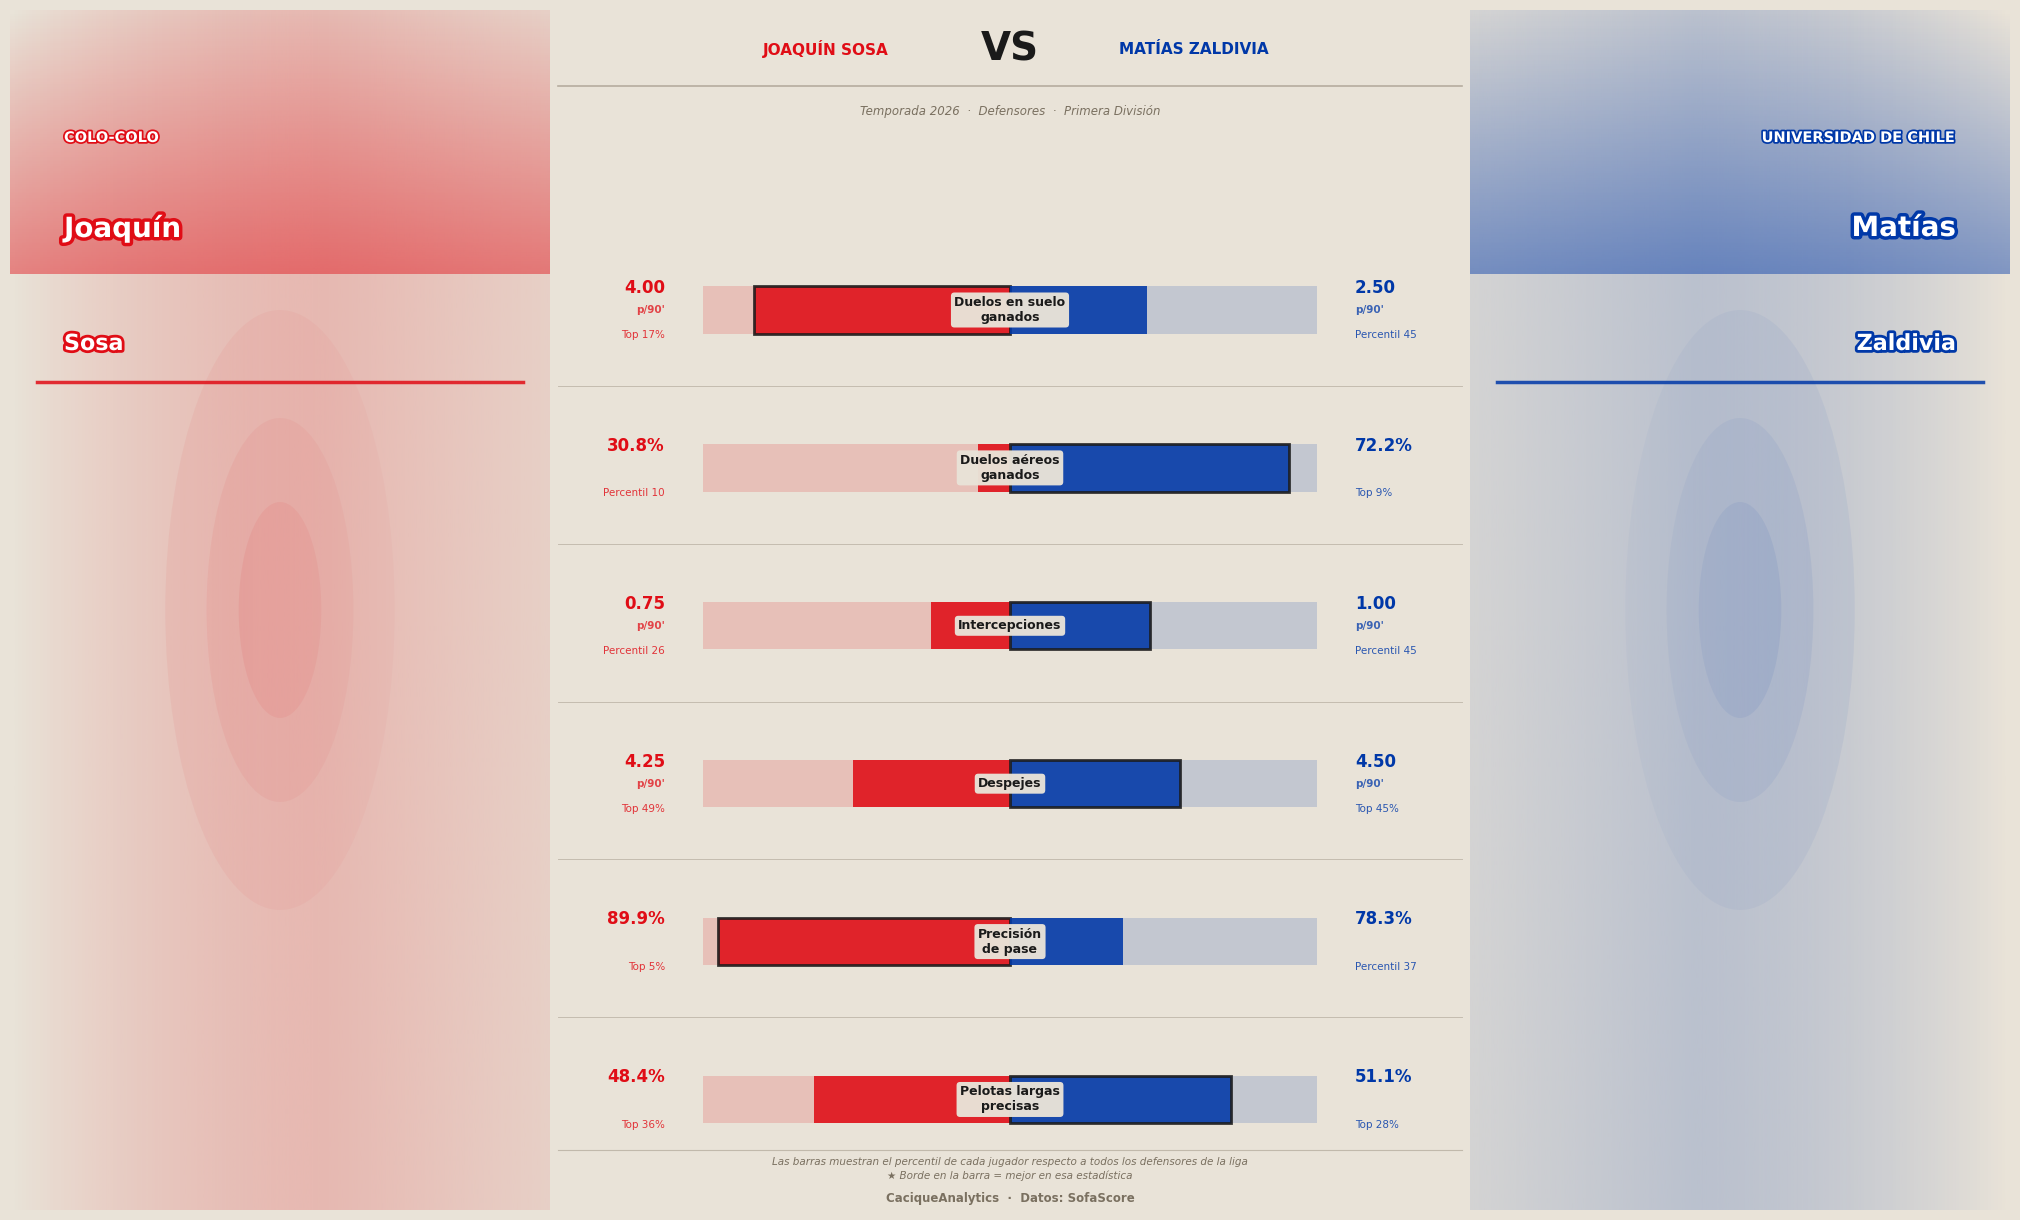

In [32]:
"""
Cell 7d — Generate improved banner
Uses STATS_COMPARISON_ES (Spanish labels) and the cream background palette.
If photo files are missing a solid colour panel is used as fallback.
When you have the photos, save them as:
  assets/joaquin_sosa.jpg   (recommended size: 700×900 px, portrait)
  assets/matias_zaldivia.jpg
and re-run this cell.
"""
build_comparison_banner(
    player1_name  = PLAYER1_NAME,
    player1_team  = PLAYER1_TEAM,
    player1_color = PLAYER1_COLOR,
    player1_photo = PLAYER1_PHOTO,
    player2_name  = PLAYER2_NAME,
    player2_team  = PLAYER2_TEAM,
    player2_color = PLAYER2_COLOR,
    player2_photo = PLAYER2_PHOTO,
    season        = SEASON,
    position      = POSITION,
    stats         = STATS_COMPARISON_ES,
)


In [46]:
"""
Cell 7f — build_player_bars_card
Bars sized by raw value + dotted league-median line. Zero text.
"""

def build_player_bars_card(
    player_name: str, bar_color: str,
    side: str,
    season: str, position: str, stats: list,
) -> None:
    import matplotlib.pyplot as plt

    df = df_2026 if season == "2026" else df_2025
    p  = get_player(df, player_name)
    if p is None:
        print(f"Player not found: {player_name}")
        return

    pool    = _get_pool(position)
    T       = COMP_THEME
    metrics = [s[0] for s in stats]
    is_pcts = [s[3] for s in stats]

    raw_vals, medians, scales = [], [], []
    for col, is_pct in zip(metrics, is_pcts):
        series = pool[col].dropna()
        raw_vals.append(float(p[col]))
        medians.append(float(series.median()))
        scales.append(100.0 if is_pct else float(series.quantile(0.95)))

    n = len(metrics)

    FIG_W, FIG_H = 10.5 * 1.05, 13.65 * 1.05
    fig, ax = plt.subplots(figsize=(FIG_W, FIG_H), facecolor=T["bg"])
    ax.set_facecolor(T["bg"])
    ax.axis("off")
    ax.set_clip_on(False)

    BAR_MAX     = 0.82
    BAR_H       = 0.38
    INNER       = 0.10
    OUTER       = 0.10

    ax.set_ylim(-0.5, (n - 1) + 0.5)

    if side == 'left':
        ax.set_xlim(-(BAR_MAX + OUTER), INNER)
        bar_sign = -1
    else:
        ax.set_xlim(-INNER, BAR_MAX + OUTER)
        bar_sign =  1

    for i, (col, is_pct) in enumerate(zip(metrics, is_pcts)):
        y     = n - 1 - i
        fill  = min(raw_vals[i] / scales[i], 1.0)
        med_r = min(medians[i]  / scales[i], 1.0)

        # Track
        ax.barh(y, bar_sign * BAR_MAX, left=0, height=BAR_H,
                color=bar_color, alpha=0.18, align='center', linewidth=0)
        # Filled bar
        ax.barh(y, bar_sign * fill * BAR_MAX, left=0, height=BAR_H,
                color=bar_color, alpha=0.90, align='center', linewidth=0)
        # Dotted median line
        med_x = bar_sign * med_r * BAR_MAX
        ax.plot([med_x, med_x], [y - BAR_H * 0.72, y + BAR_H * 0.72],
                color=T["label"], linewidth=1.8,
                linestyle=(0, (3, 2)), alpha=0.55, zorder=6,
                solid_capstyle='round')

    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)

    slug = player_name.replace(' ', '_')
    _save(fig, f"{slug}_{season}_bars_{side}.png")
    _save(fig, f"{slug}_{season}_bars_{side}_transparent.png", transparent=True)
    plt.show()


print("build_player_bars_card (bars + median, no text) defined.")


build_player_bars_card (bars + median, no text) defined.


Saved -> outputs/Joaquín_Sosa_2026_bars_left.png
Saved -> outputs/Joaquín_Sosa_2026_bars_left_transparent.png


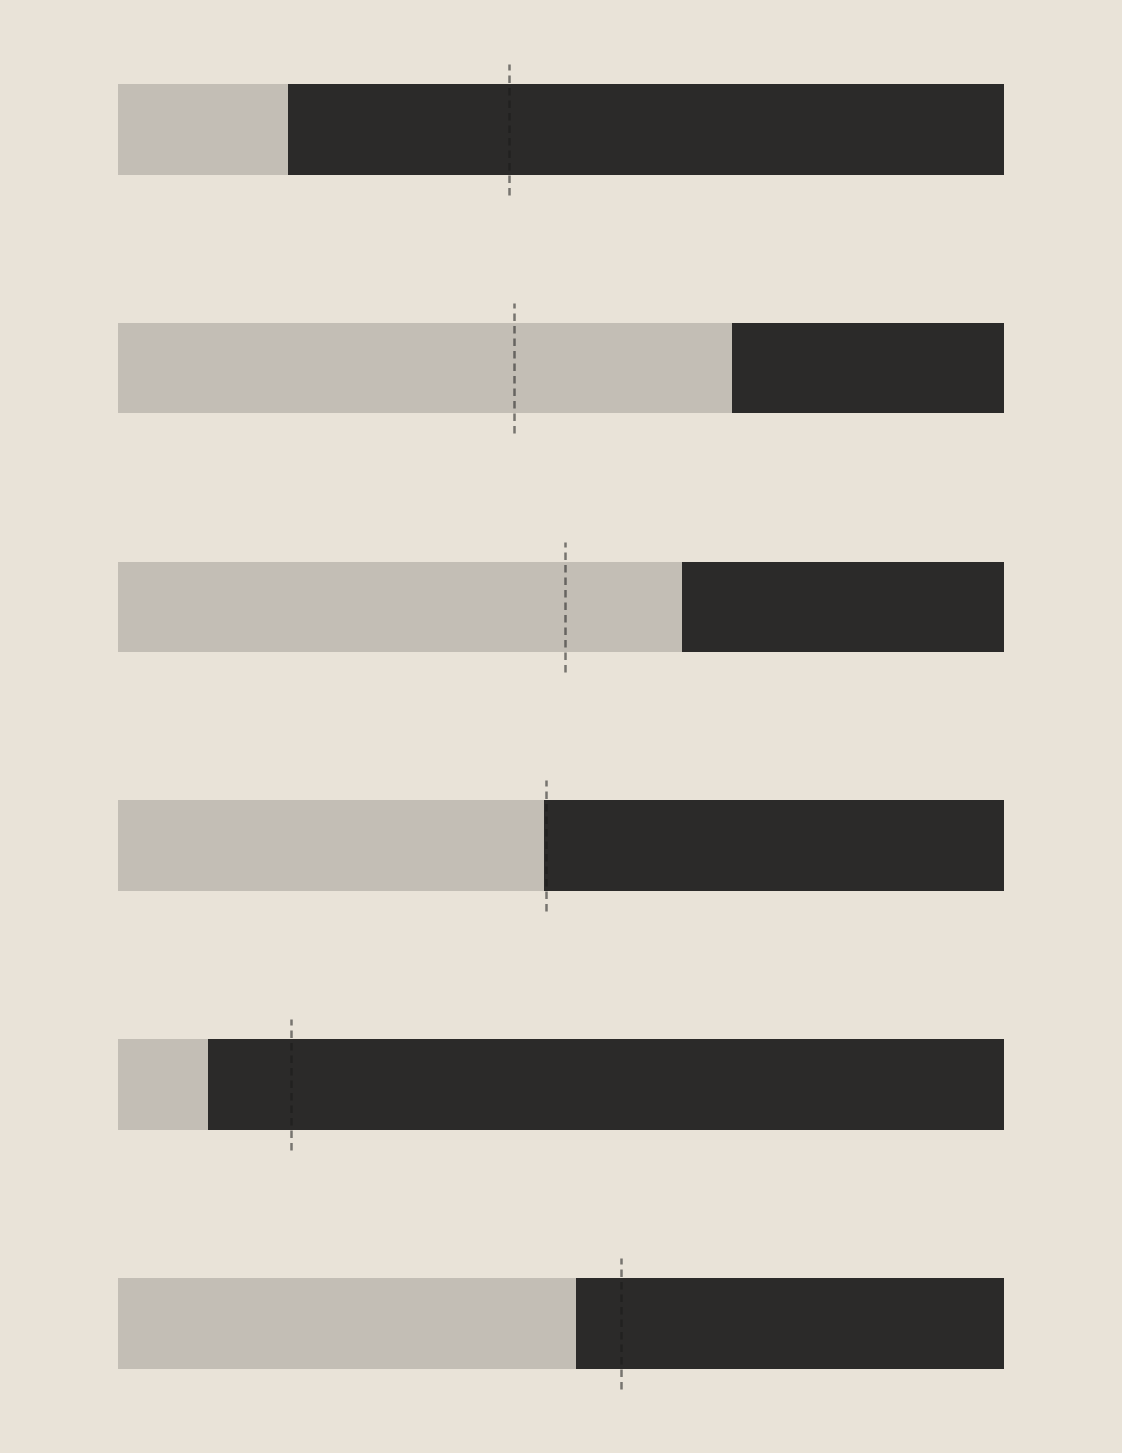

Saved -> outputs/Matías_Zaldivia_2026_bars_right.png
Saved -> outputs/Matías_Zaldivia_2026_bars_right_transparent.png


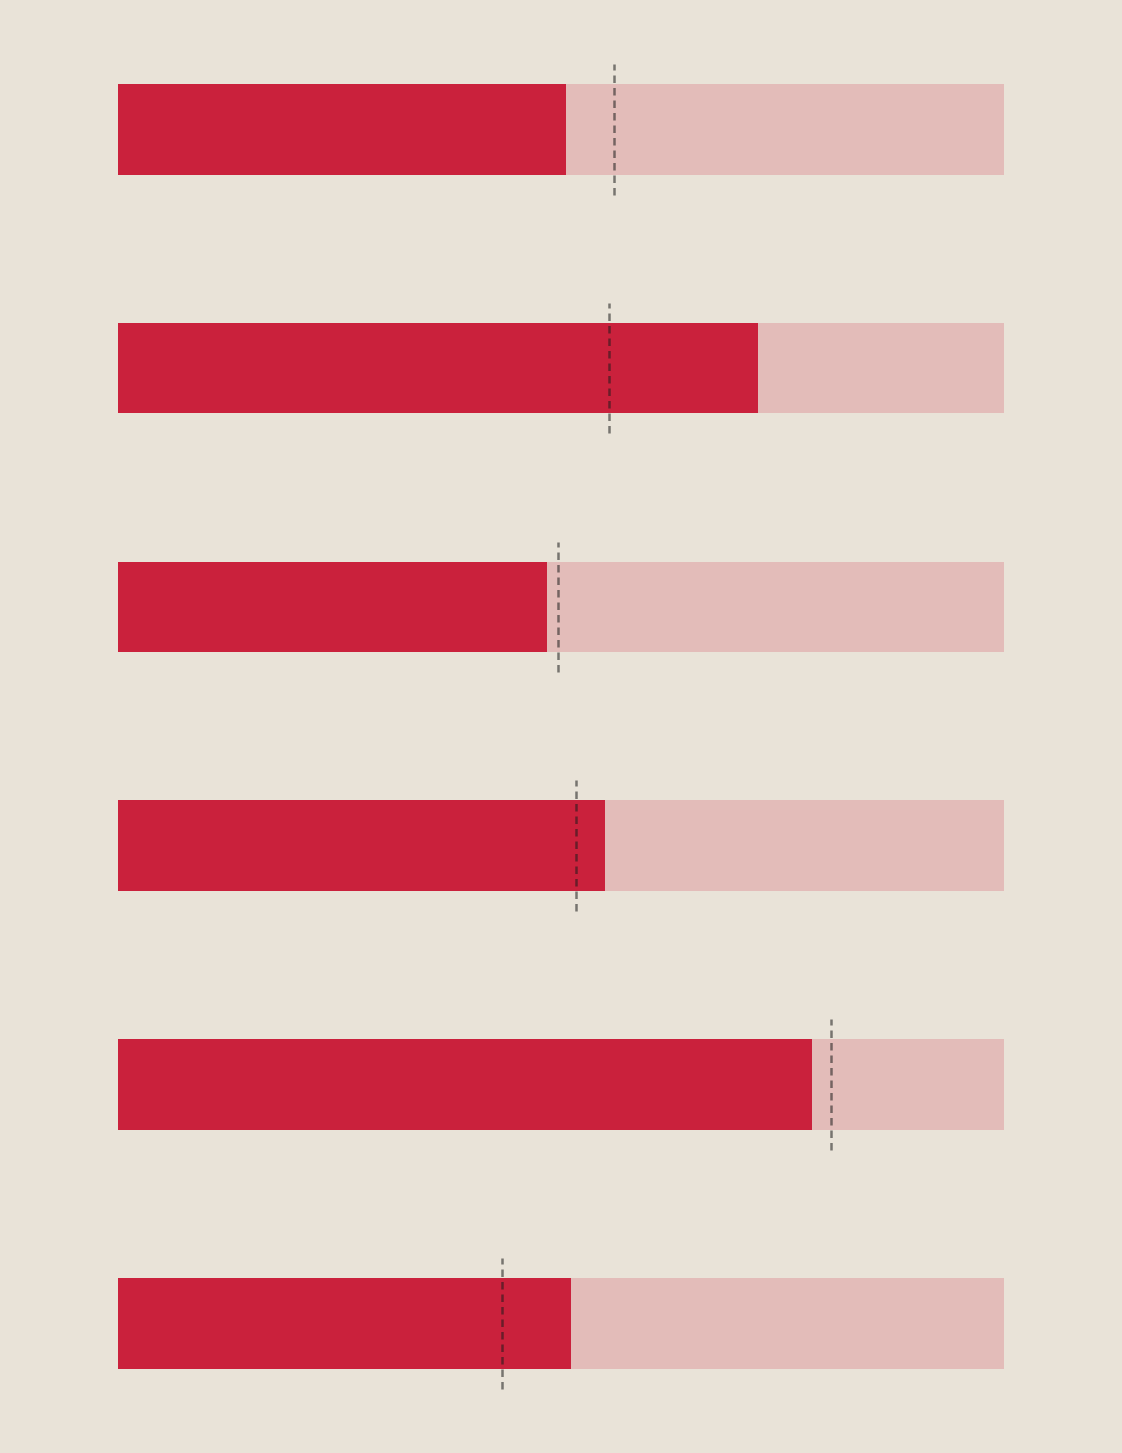

In [ ]:
"""
Cell 7g — Generate bars-only Twitter book-format card pair

Left card  (Sosa):     Cacique red bars,   extend left
Right card (Villagra): Cacique black bars, extend right
"""

BAR_COLOR_SOSA     = "#E00D16"   # Cacique red
BAR_COLOR_VILLAGRA = "#1A1A1A"   # Cacique black

# Left card — Joaquín Sosa
build_player_bars_card(
    player_name = PLAYER1_NAME,
    bar_color   = BAR_COLOR_SOSA,
    side        = "left",
    season      = SEASON,
    position    = POSITION,
    stats       = STATS_COMPARISON_ES,
)

# Right card — Jonathan Villagra
build_player_bars_card(
    player_name = PLAYER2_NAME,
    bar_color   = BAR_COLOR_VILLAGRA,
    side        = "right",
    season      = SEASON,
    position    = POSITION,
    stats       = STATS_COMPARISON_ES,
)


Saved -> ..\outputs\sosa_vs_zaldivia\Joaquín_Sosa_vs_Matías_Zaldivia_2026_banner_skeleton_transparent.png


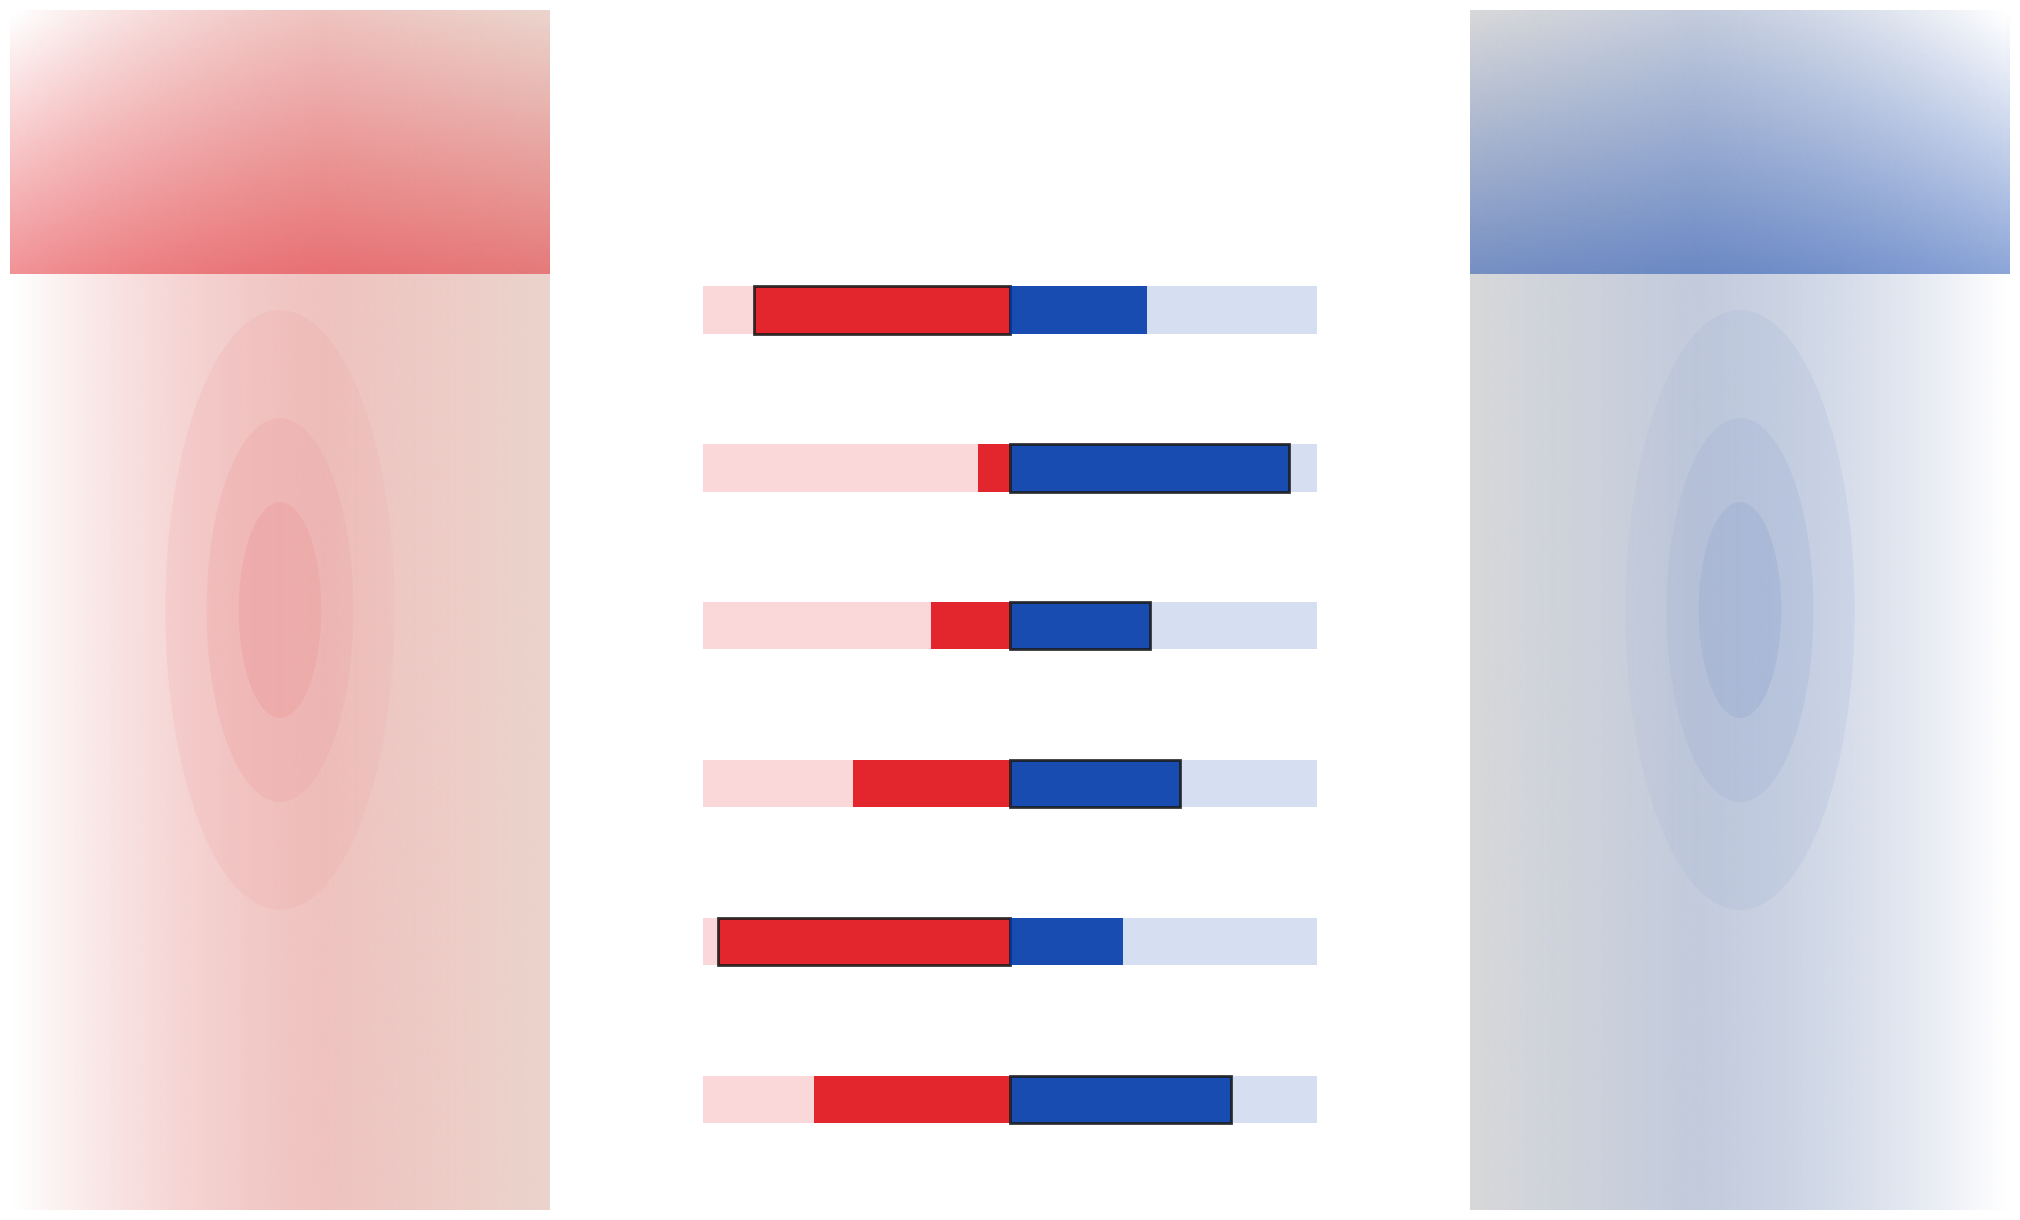

In [33]:
"""
Cell 7e — Skeleton (label-free) banner — transparent PNG
Same layout and proportions as the full banner, but with:
  · Zero text — no names, values, labels, percentiles, header, or footer
  · Transparent background (facecolor="none")
  · Warm colours only: red side panel + blue side panel + bars at real percentile widths

Use this asset in Canva / Photopea: drop the player photos and add your own
text layers directly in the design tool.
"""

def build_comparison_banner_skeleton(
    player1_color: str,
    player2_color: str,
    player1_photo: str,
    player2_photo: str,
    season: str, position: str,
    stats: list,
) -> None:
    """
    Renders the banner graphic structure with no text whatsoever.
    Exports a transparent-background PNG only.
    """
    df   = df_2026 if season == "2026" else df_2025
    p1   = get_player(df, PLAYER1_NAME)
    p2   = get_player(df, PLAYER2_NAME)
    if p1 is None or p2 is None:
        return

    pool = _get_pool(position)
    T    = COMP_THEME

    metrics = [s[0] for s in stats]
    is_pcts = [s[3] for s in stats]

    pct1, pct2 = [], []
    for col in metrics:
        series = pool[col].dropna()
        pct1.append(percentileofscore(series, float(p1[col]), kind='rank'))
        pct2.append(percentileofscore(series, float(p2[col]), kind='rank'))

    n = len(metrics)

    fig = plt.figure(figsize=(20, 12), facecolor="none")
    gs = gridspec.GridSpec(
        1, 3,
        left=0.0, right=1.0, top=1.0, bottom=0.0,
        wspace=0.0,
        width_ratios=[0.27, 0.46, 0.27],
    )
    ax_l = fig.add_subplot(gs[0, 0])
    ax_c = fig.add_subplot(gs[0, 1])
    ax_r = fig.add_subplot(gs[0, 2])

    for ax in [ax_l, ax_c, ax_r]:
        ax.set_facecolor("none")
        ax.axis("off")
        ax.set_clip_on(False)

    def draw_side_panel(ax, photo_path, color, lado):
        """Colour-only side panel: photo (if available) + gradient fade — no text."""
        try:
            img = Image.open(photo_path).convert("RGB")
            ax.imshow(np.array(img), aspect='auto',
                      extent=[0, 1, 0, 1], transform=ax.transAxes, zorder=1)
        except Exception:
            from matplotlib.colors import to_rgb
            r, g, b = to_rgb(color)
            grad = np.zeros((200, 200, 4))
            for row in range(200):
                for col_idx in range(200):
                    t = col_idx / 199 if lado == 'left' else (199 - col_idx) / 199
                    alpha = max(0.0, min(0.35, t * 0.60))
                    grad[row, col_idx] = [r, g, b, alpha]
            ax.imshow(grad, aspect='auto',
                      extent=[0, 1, 0, 1], transform=ax.transAxes, zorder=2)

            for radius, a in [(0.50, 0.07), (0.32, 0.09), (0.18, 0.12)]:
                ax.add_patch(mpatches.Ellipse(
                    (0.50, 0.50), radius * 0.85, radius,
                    facecolor=color, alpha=a,
                    transform=ax.transAxes, zorder=3,
                ))

        # Gradient fade toward centre
        if lado == 'left':
            fade_colors = [(*(to_rgba(T["bg"])[:3]), 0.0), (*(to_rgba(T["bg"])[:3]), 0.96)]
        else:
            fade_colors = [(*(to_rgba(T["bg"])[:3]), 0.96), (*(to_rgba(T["bg"])[:3]), 0.0)]
        fade_cmap = LinearSegmentedColormap.from_list("fade", fade_colors)
        ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), aspect='auto',
                  extent=[0, 1, 0, 1], cmap=fade_cmap,
                  transform=ax.transAxes, zorder=4, alpha=0.78)

        # Top colour stripe (team accent)
        top_cmap = LinearSegmentedColormap.from_list("top_fade", [
            (*(to_rgba(color)[:3]), 0.75),
            (*(to_rgba(color)[:3]), 0.0),
        ])
        ax.imshow(np.linspace(1, 0, 100).reshape(-1, 1), aspect='auto',
                  extent=[0, 1, 0.78, 1.0], cmap=top_cmap,
                  transform=ax.transAxes, zorder=5, alpha=0.60)

    draw_side_panel(ax_l, player1_photo, player1_color, lado='left')
    draw_side_panel(ax_r, player2_photo, player2_color, lado='right')

    # Centre panel — bars only, no text
    ax = ax_c
    TOP_Y   = n + 0.70
    BOT_Y   = -0.70
    BAR_MAX = 0.80
    BAR_H   = 0.30
    ax.set_xlim(-1.20, 1.20)
    ax.set_ylim(BOT_Y, TOP_Y + 0.2)
    ax.set_facecolor("none")

    for i in range(n):
        y   = n - 1 - i
        pl  = pct1[i] / 100
        pr  = pct2[i] / 100
        p1w = pct1[i] >= pct2[i]

        # Empty tracks
        ax.barh(y, -BAR_MAX, left=0, height=BAR_H,
                color=player1_color, alpha=0.16, align='center', linewidth=0)
        ax.barh(y,  BAR_MAX, left=0, height=BAR_H,
                color=player2_color, alpha=0.16, align='center', linewidth=0)

        # Filled bars
        ax.barh(y, -(pl * BAR_MAX), left=0, height=BAR_H,
                color=player1_color, alpha=0.88, align='center',
                linewidth=2.0 if p1w else 0,
                edgecolor=T["label"] if p1w else 'none')
        ax.barh(y,  (pr * BAR_MAX), left=0, height=BAR_H,
                color=player2_color, alpha=0.88, align='center',
                linewidth=2.0 if (not p1w) else 0,
                edgecolor=T["label"] if (not p1w) else 'none')

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    slug1 = PLAYER1_NAME.replace(' ', '_')
    slug2 = PLAYER2_NAME.replace(' ', '_')
    fname = f"{slug1}_vs_{slug2}_{season}_banner_skeleton_transparent.png"
    out   = OUTPUT_PATH / fname
    fig.savefig(out, dpi=150, bbox_inches="tight",
                facecolor="none", transparent=True)
    print(f"Saved -> {out}")
    plt.show()


build_comparison_banner_skeleton(
    player1_color = PLAYER1_COLOR,
    player2_color = PLAYER2_COLOR,
    player1_photo = PLAYER1_PHOTO,
    player2_photo = PLAYER2_PHOTO,
    season        = SEASON,
    position      = POSITION,
    stats         = STATS_COMPARISON_ES,
)


In [8]:
"""
Cell 8 — Light-background radar (#e9e3d8)
Version for stories or artwork with a beige/cream background.
Reuses build_radar_light from notebook 04 if it was already loaded.
Falls back to build_radar with minimal=True otherwise.
"""
if 'build_radar_light' in dir():
    # build_radar_light compares one player across seasons — not applicable here.
    # For the clásico use the dark radar (Cell 4) or minimal (Cell 5) as the final asset.
    print("build_radar_light is available but does not apply to cross-player comparisons.")
    print("   Use Cell 4 (dark radar) or Cell 5 (minimal) for the final artwork.")
else:
    print("build_radar_light not loaded. Run 04_jeyson_rojas_2026 first if you need it.")

ℹ️  build_radar_light not loaded. Run 04_jeyson_rojas_2026 first if you need it.


In [20]:
"""
Cell 9 — Generated files summary
Lists all exported PNGs for this comparison.
"""
slug1 = PLAYER1_NAME.replace(' ', '_')
slug2 = PLAYER2_NAME.replace(' ', '_')

generated = sorted(OUTPUT_PATH.glob(f"*{slug1}*")) + \
            sorted(OUTPUT_PATH.glob(f"*{slug2}*"))

# Deduplicate
seen = set()
unique = [f for f in generated if not (f.name in seen or seen.add(f.name))]

print(f"Generated files — {PLAYER1_NAME} vs {PLAYER2_NAME} {SEASON}:")
print(f"Folder: {OUTPUT_PATH}\n")
for f in unique:
    size_kb = f.stat().st_size / 1024
    print(f"  {f.name:<75}  {size_kb:>7.1f} KB")

if not unique:
    print("  (no files found — run cells 4-7 first)")


Generated files — Joaquín Sosa vs Matías Zaldivia 2026:

  Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026.png                                  254.9 KB
  Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_minimal.png                          218.8 KB
  Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_minimal_transparent.png              211.3 KB
  Joaquín_Sosa_2026_vs_Matías_Zaldivia_2026_transparent.png                      238.8 KB
  Joaquín_Sosa_vs_Matías_Zaldivia_2026_comparison_card.png                        79.0 KB
  Joaquín_Sosa_vs_Matías_Zaldivia_2026_comparison_card_transparent.png            70.7 KB
